In [52]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [2]:
import sklearn
sklearn.__version__
print(sklearn.__version__)

0.24.2


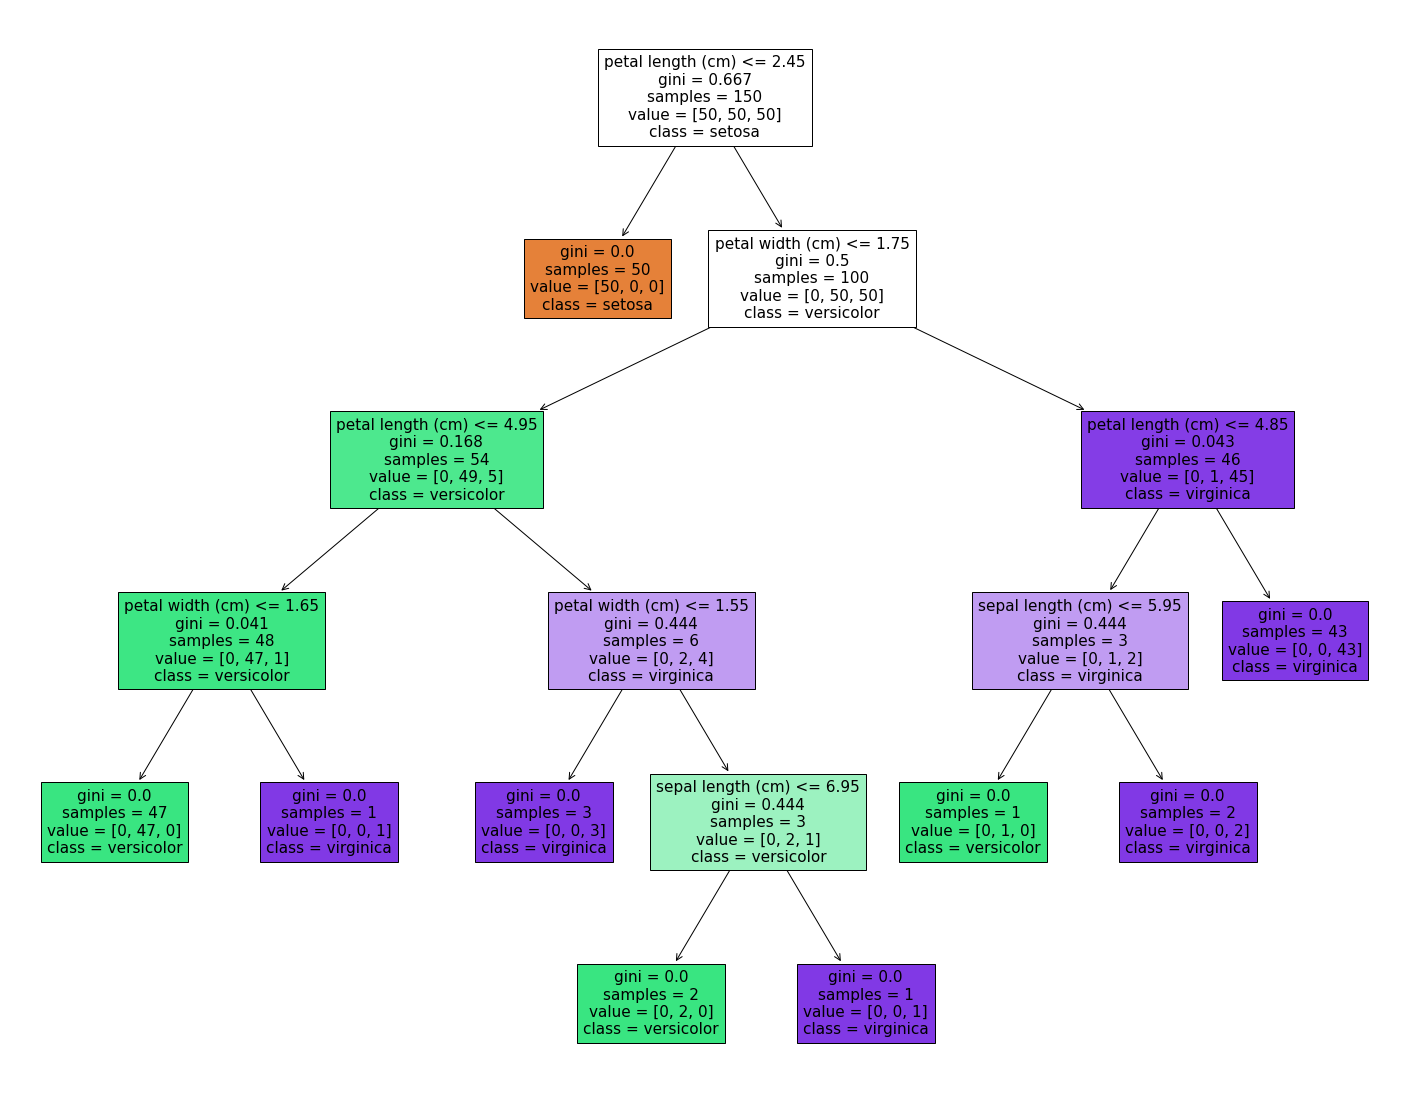

In [2]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

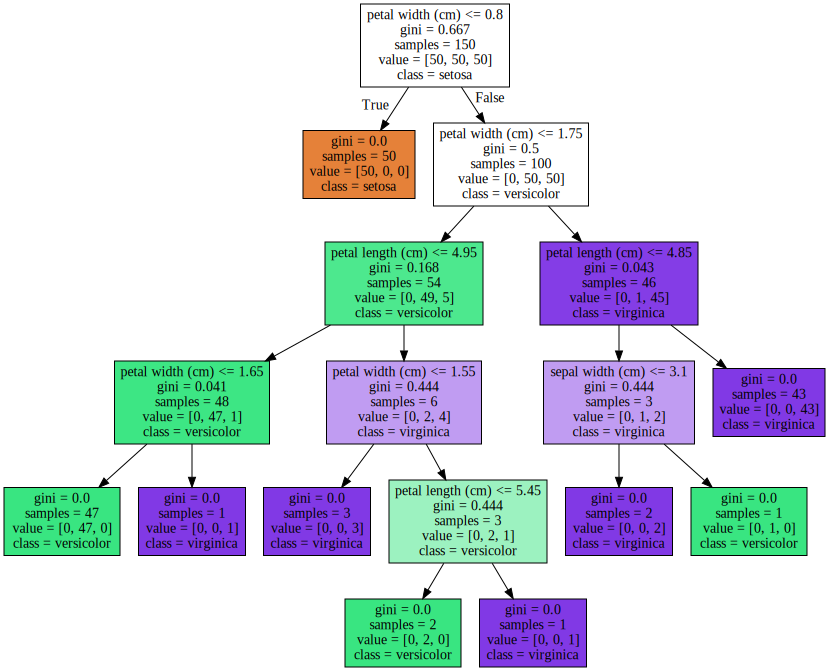

In [53]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

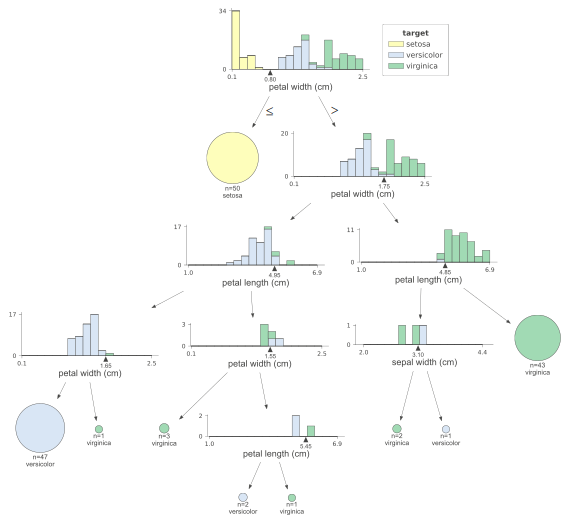

In [54]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("tset accuracy :",accuracy_score(y_test, pred))
print("TEST ACCUARCY SCORE: " ,clf.score(X_test,y_test))
print("TRAIN DATA ACCUARCY SCORE: " ,clf.score(X_train, y_train))


tset accuracy : 0.8811188811188811
TEST ACCUARCY SCORE:  0.8811188811188811
TRAIN DATA ACCUARCY SCORE:  1.0


[Text(468.32142857142856, 513.4, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(298.9285714285714, 453.0, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(199.28571428571428, 392.6, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(119.57142857142856, 332.2, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(79.71428571428571, 271.8, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(39.857142857142854, 211.39999999999998, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(119.57142857142856, 211.39999999999998, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(79.71428571428571, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(159.42857142857142, 151.0, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(119.57142857142856, 90.59999999999997, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(79.71428571428571

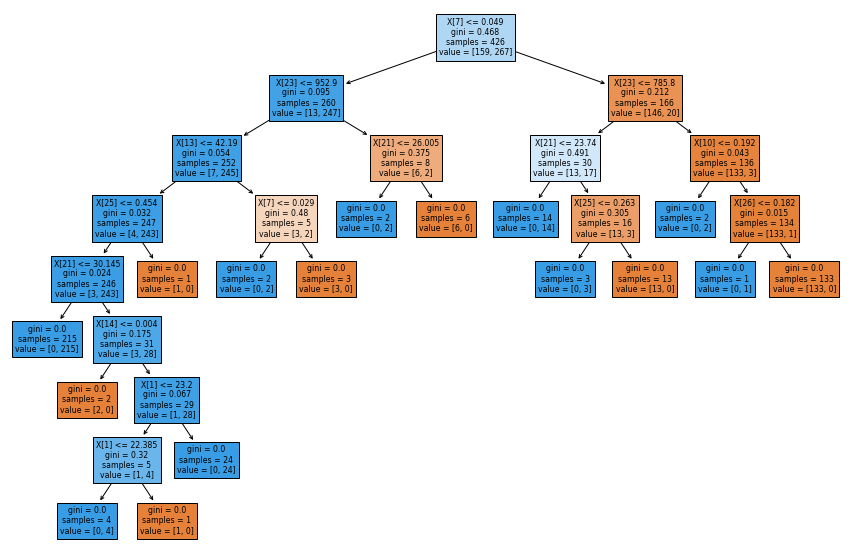

In [4]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [30]:
############## COST COMPLEXITY PRUNING ##############################

path = clf.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

In [31]:
path.ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [32]:
path.impurities

array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
       0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
       0.10634033, 0.14056508, 0.46786352])

In [33]:
acc = []
for i in path.ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    clf.fit(X_train,y_train)
    acc.append(clf)

In [34]:
acc   ##### DT with different ccp alpha values

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3272984419327777, random_state=0)]

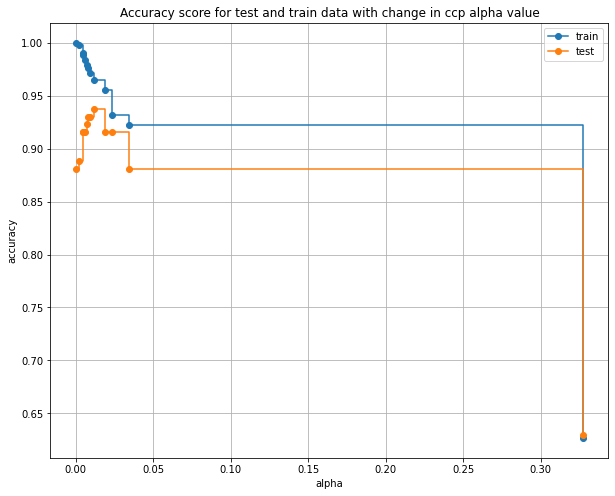

In [50]:
import matplotlib.pyplot as plt
acc_train = [i.score(X_train,y_train) for i in acc]
acc_test = [i.score(X_test,y_test) for i in acc]
plt.figure(figsize =(10,8))
plt.title('Accuracy score for test and train data with change in ccp alpha value')
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.plot(path.ccp_alphas,acc_train,marker='o', label="train",drawstyle="steps-post")
plt.plot(path.ccp_alphas,acc_test,marker='o', label="test",drawstyle="steps-post")
plt.legend()
plt.grid()
plt.show()

In [46]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.03)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03, random_state=0)

In [47]:
clf.score(X_train,y_train)

0.931924882629108

In [48]:
clf.score(X_test,y_test)

0.916083916083916

[Text(267.84000000000003, 453.0, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(133.92000000000002, 271.8, 'gini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(401.76000000000005, 271.8, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(267.84000000000003, 90.59999999999997, 'gini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(535.6800000000001, 90.59999999999997, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

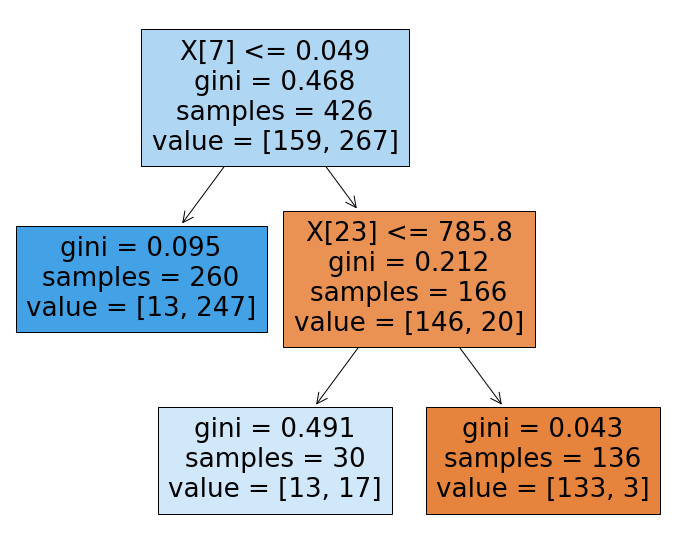

In [49]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(clf,filled=True)

In [72]:
r = tree.export_text(clf,max_depth=2)
print(r)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- truncated branch of depth 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- truncated branch of depth 3
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- truncated branch of depth 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [74]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame =True)
import pandas as pd
#### DATA FRAME in pandas #####
df = pd.DataFrame(data.data,columns=data.feature_names)
df2 = pd.DataFrame(data.target,columns=['target'])
final_dataset = pd.concat([df,df2],axis=1)
final_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


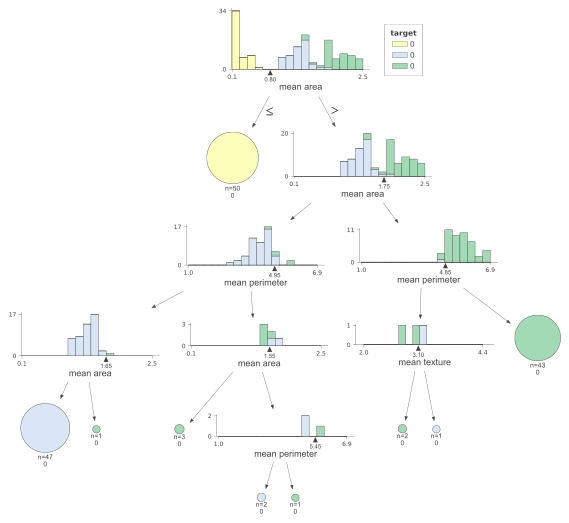

<Figure size 1080x864 with 0 Axes>

In [64]:
from dtreeviz.trees import dtreeviz # remember to load the package
plt.figure(figsize=(15,12))
viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=data.feature_names,
                class_names=list(data.target))

viz